In [132]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
% matplotlib inline
df = pd.read_csv('rainfall_in_india_1901-2015.csv')
df.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## Задание 1
#### Постройте графики количества осадков по годам в разных штатах. Сделайте выводы по построенным графикам.

In [133]:
precipitation = df.groupby(['SUBDIVISION'])
fig, ax = pl.subplots(figsize=(8, 6))
for label, df_new in precipitation:
    df_new.plot(kind='line', ax=ax, label=label, x='YEAR', y='ANNUAL', figsize=(30, 20))
pl.show()


## Задание 2
#### Постройте графики количества осадков по месяцам по всем годам кумулятивно. Сделайте выводы по построенным графикам.

In [134]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [135]:
cum_sum = df[df.columns[2:-5]]
cum_sum = cum_sum.cumsum()
cum_sum.plot()
pl.show()


## Задание 3
#### Постройте графики количества осадков по штатам, используйте boxplot. Сделайте выводы по построенным графикам.

In [136]:
pl.figure(figsize=(10, 30))
sns.boxplot(y='SUBDIVISION', x='ANNUAL', data=df)
pl.show()


## Задание 4
#### Определите штаты, для которых количество осадков минимально и максимально.

In [137]:
print('Max annual value in state: ' + df.iloc[df['ANNUAL'].idxmax()]['SUBDIVISION'])
print('Min annual value in state: ' + df.iloc[df['ANNUAL'].idxmin()]['SUBDIVISION'])


Max annual value in state: ARUNACHAL PRADESH
Min annual value in state: WEST RAJASTHAN


## Задание 5
#### Выведите уникальные имена штатов и территорий Индии.

In [138]:
print('Unique subdivision')
df['SUBDIVISION'].unique()


Unique subdivision


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

## Задание 6
#### Определите количество лет наблюдений для каждого штата.

In [139]:
noy = {state: df[df['SUBDIVISION'] == state].count()['SUBDIVISION'] for state in df['SUBDIVISION'].unique()}
noy

{'ANDAMAN & NICOBAR ISLANDS': 110,
 'ARUNACHAL PRADESH': 97,
 'ASSAM & MEGHALAYA': 115,
 'BIHAR': 115,
 'CHHATTISGARH': 115,
 'COASTAL ANDHRA PRADESH': 115,
 'COASTAL KARNATAKA': 115,
 'EAST MADHYA PRADESH': 115,
 'EAST RAJASTHAN': 115,
 'EAST UTTAR PRADESH': 115,
 'GANGETIC WEST BENGAL': 115,
 'GUJARAT REGION': 115,
 'HARYANA DELHI & CHANDIGARH': 115,
 'HIMACHAL PRADESH': 115,
 'JAMMU & KASHMIR': 115,
 'JHARKHAND': 115,
 'KERALA': 115,
 'KONKAN & GOA': 115,
 'LAKSHADWEEP': 114,
 'MADHYA MAHARASHTRA': 115,
 'MATATHWADA': 115,
 'NAGA MANI MIZO TRIPURA': 115,
 'NORTH INTERIOR KARNATAKA': 115,
 'ORISSA': 115,
 'PUNJAB': 115,
 'RAYALSEEMA': 115,
 'SAURASHTRA & KUTCH': 115,
 'SOUTH INTERIOR KARNATAKA': 115,
 'SUB HIMALAYAN WEST BENGAL & SIKKIM': 115,
 'TAMIL NADU': 115,
 'TELANGANA': 115,
 'UTTARAKHAND': 115,
 'VIDARBHA': 115,
 'WEST MADHYA PRADESH': 115,
 'WEST RAJASTHAN': 115,
 'WEST UTTAR PRADESH': 115}

## Задание 7
#### Определите штат с наименьшим количеством наблюдений.

In [140]:
min(noy.keys(), key=noy.get)

'ARUNACHAL PRADESH'

## Задание 8
#### Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [141]:
df['SUM_JAN_FEB'] = df['JAN'] + df['FEB']
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,SUM_JAN_FEB
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,136.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,159.8
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,156.7
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,24.1
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,1.3


## Задание 9
#### Вычислите корреляцию Пирсона и Спирмена между признаками NOV и MAR. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [142]:
from scipy import stats
stats.spearmanr(df['NOV'], df['MAR'])

C:\IntelPython3\lib\site-packages\scipy\stats\mstats_basic.py:484: RuntimeWarning: overflow encountered in long_scalars
  denom = n*(n**2 - 1)/6.


SpearmanrResult(correlation=nan, pvalue=nan)

In [143]:
stats.pearsonr(df['NOV'], df['MAR'])

C:\IntelPython3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


(nan, 1.0)

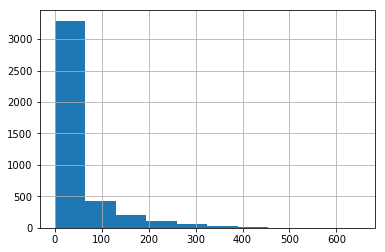

In [144]:
df['NOV'].hist()

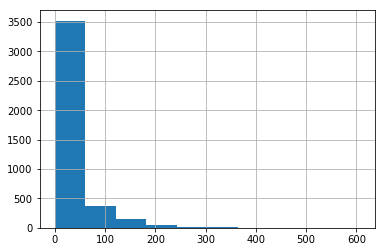

In [145]:
df['MAR'].hist()

#### По обоим полученным p-value можно принять теорию о том, что признаки NOV и MAR коррелируют между собой.